In [2]:
%pip install -q -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


### 1. Import Libraries


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

warnings.filterwarnings('ignore')

In [11]:
# Visualization settings
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

# Pandas display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [14]:
print(os.getcwd())
print(os.listdir())  # check what’s inside current folder
print(os.listdir("data"))

d:\ML\Student-Score-Predictor
['.git', '01_Data_exploration.ipynb', 'data', 'README.md', 'requirements.txt']
['processed', 'raw']


### 2. Load data set

In [4]:
df = pd.read_csv('data/raw/StudentPerformanceFactors.csv')
df.head(5)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [5]:
print(f"Dataset shape: {df.shape}")
print(f"Number of students: {df.shape[0]}")
print(f"Number of features: {df.shape[1]}")

Dataset shape: (6607, 20)
Number of students: 6607
Number of features: 20


### 3. Data Overview

In [6]:
print("\n--- Dataset Info ---")
print(df.info())

print("\n--- Statistical Summary ---")
print(df.describe())



--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence            

### 4. Data quality check


In [7]:
print("\n--- Missing Values ---")
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing_Count': missing_values,
    'Missing_Percent': missing_percent
})
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)
print(missing_df if len(missing_df) > 0 else "No missing values found!")

print("\n--- Duplicate Rows ---")
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

print("\n--- Unique Values per Column ---")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")


--- Missing Values ---
                          Missing_Count  Missing_Percent
Parental_Education_Level             90         1.362192
Teacher_Quality                      78         1.180566
Distance_from_Home                   67         1.014076

--- Duplicate Rows ---
Number of duplicate rows: 0

--- Unique Values per Column ---
Hours_Studied: 41 unique values
Attendance: 41 unique values
Parental_Involvement: 3 unique values
Access_to_Resources: 3 unique values
Extracurricular_Activities: 2 unique values
Sleep_Hours: 7 unique values
Previous_Scores: 51 unique values
Motivation_Level: 3 unique values
Internet_Access: 2 unique values
Tutoring_Sessions: 9 unique values
Family_Income: 3 unique values
Teacher_Quality: 3 unique values
School_Type: 2 unique values
Peer_Influence: 3 unique values
Physical_Activity: 7 unique values
Learning_Disabilities: 2 unique values
Parental_Education_Level: 3 unique values
Distance_from_Home: 3 unique values
Gender: 2 unique values
Exam_Score: 45 u

### 5. Target variable analysis

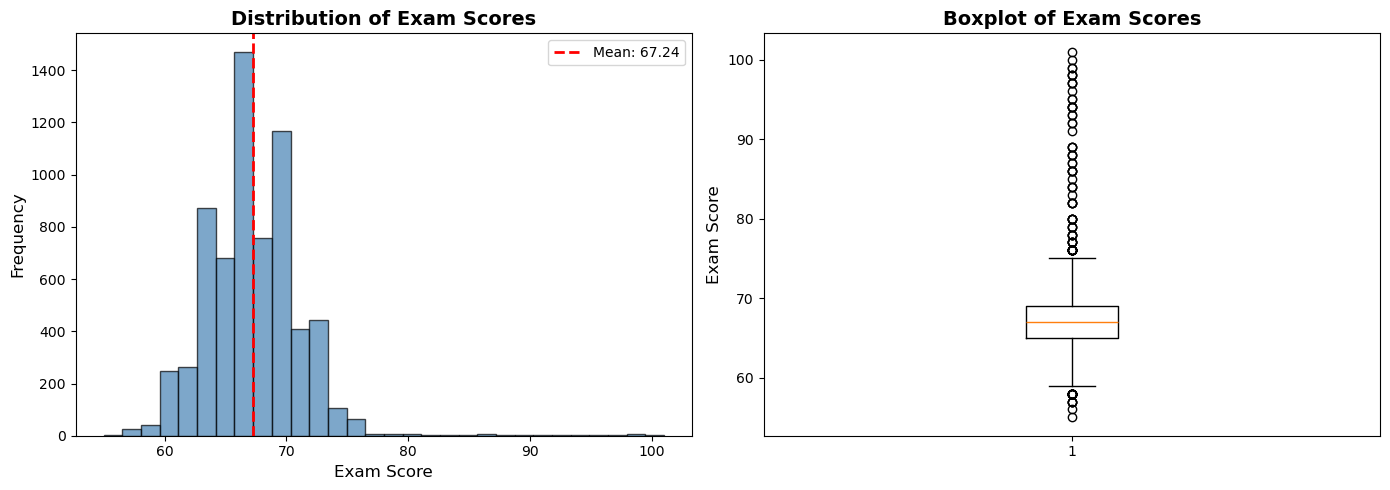


Exam Score Statistics:
count    6607.000000
mean       67.235659
std         3.890456
min        55.000000
25%        65.000000
50%        67.000000
75%        69.000000
max       101.000000
Name: Exam_Score, dtype: float64


In [8]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(df['Exam_Score'], bins=30, edgecolor='black', alpha=0.7, color='steelblue')
axes[0].axvline(df['Exam_Score'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["Exam_Score"].mean():.2f}')
axes[0].set_xlabel('Exam Score', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Distribution of Exam Scores', fontsize=14, fontweight='bold')
axes[0].legend()

axes[1].boxplot(df['Exam_Score'])
axes[1].set_ylabel('Exam Score', fontsize=12)
axes[1].set_title('Boxplot of Exam Scores', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\nExam Score Statistics:")
print(df['Exam_Score'].describe())

### 6. Numerical features analysis

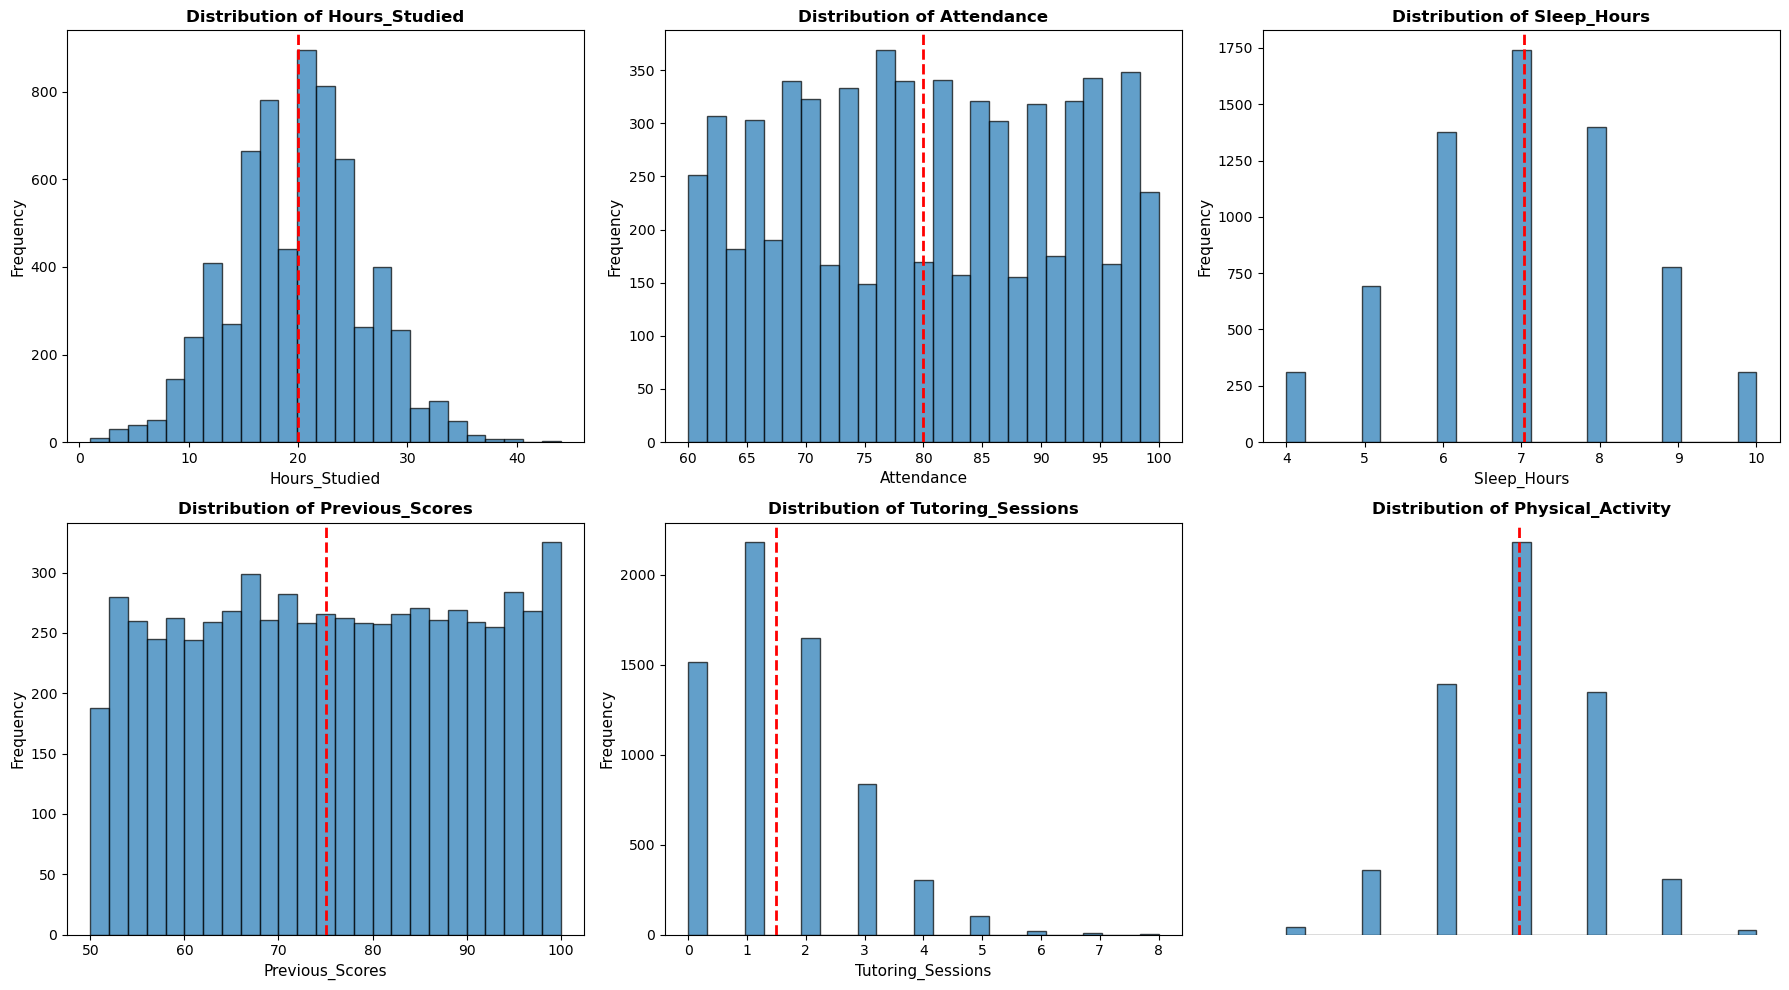

In [9]:
numerical_cols = ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 
                  'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score']

# Distribution plots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for idx, col in enumerate(numerical_cols[:-1]):  # Exclude Exam_Score
    axes[idx].hist(df[col], bins=25, edgecolor='black', alpha=0.7)
    axes[idx].axvline(df[col].mean(), color='red', linestyle='--', linewidth=2)
    axes[idx].set_xlabel(col, fontsize=11)
    axes[idx].set_ylabel('Frequency', fontsize=11)
    axes[idx].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')

axes[-1].axis('off')
plt.tight_layout()
plt.show()

### 7. Categorical features analysis


Parental_Involvement - Value Counts:
Parental_Involvement
Medium    3362
High      1908
Low       1337
Name: count, dtype: int64
--------------------------------------------------

Motivation_Level - Value Counts:
Motivation_Level
Medium    3351
Low       1937
High      1319
Name: count, dtype: int64
--------------------------------------------------

Internet_Access - Value Counts:
Internet_Access
Yes    6108
No      499
Name: count, dtype: int64
--------------------------------------------------

School_Type - Value Counts:
School_Type
Public     4598
Private    2009
Name: count, dtype: int64
--------------------------------------------------

Gender - Value Counts:
Gender
Male      3814
Female    2793
Name: count, dtype: int64
--------------------------------------------------


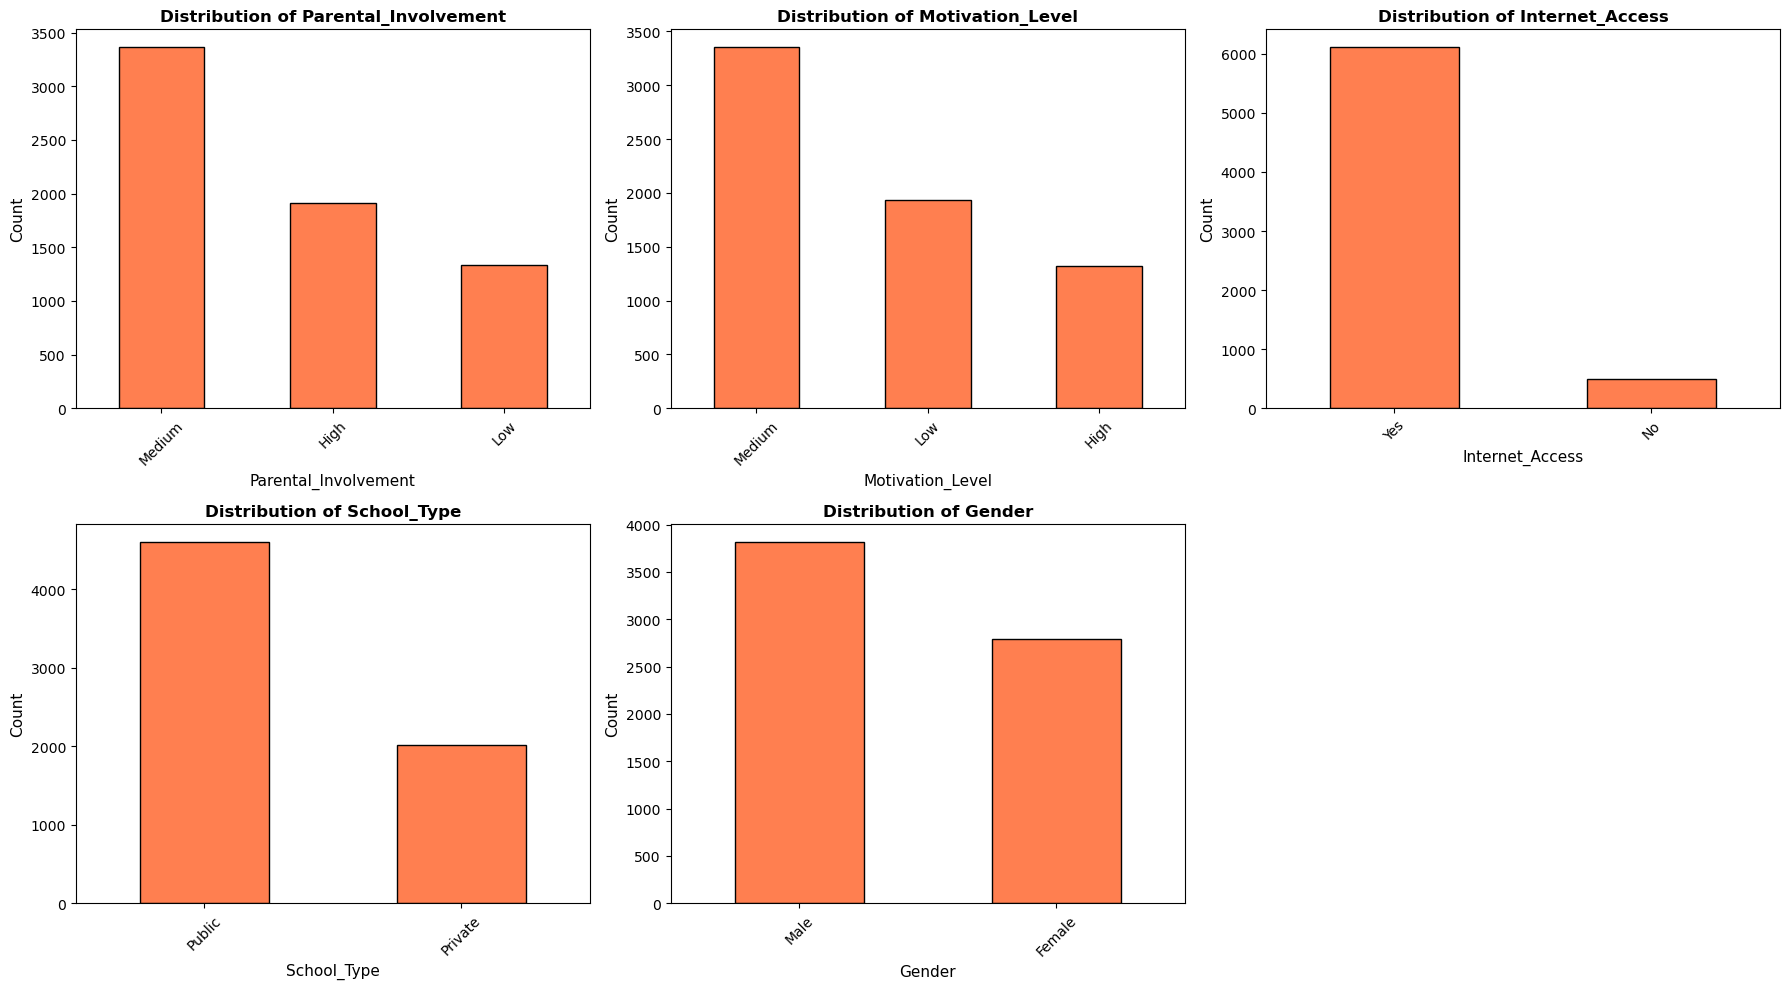

In [10]:
categorical_cols = ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities',
                    'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality',
                    'School_Type', 'Peer_Influence', 'Learning_Disabilities', 
                    'Parental_Education_Level', 'Distance_from_Home', 'Gender']

# Value counts for key categorical features
key_categoricals = ['Parental_Involvement', 'Motivation_Level', 'Internet_Access', 
                    'School_Type', 'Gender']

for col in key_categoricals:
    print(f"\n{col} - Value Counts:")
    print(df[col].value_counts())
    print("-" * 50)

# Visualize categorical features
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for idx, col in enumerate(key_categoricals):
    df[col].value_counts().plot(kind='bar', ax=axes[idx], edgecolor='black', color='coral')
    axes[idx].set_xlabel(col, fontsize=11)
    axes[idx].set_ylabel('Count', fontsize=11)
    axes[idx].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
    axes[idx].tick_params(axis='x', rotation=45)

axes[-1].axis('off')
plt.tight_layout()
plt.show()

### 8. Correlation Analysis

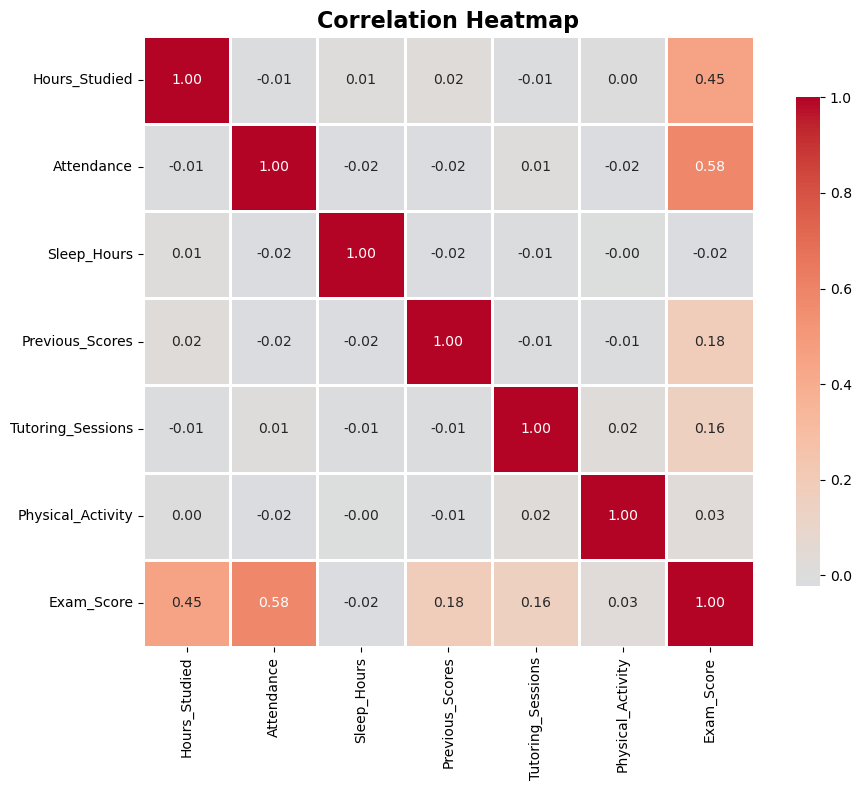


Correlation with Exam_Score:
Exam_Score           1.000000
Attendance           0.581072
Hours_Studied        0.445455
Previous_Scores      0.175079
Tutoring_Sessions    0.156525
Physical_Activity    0.027824
Sleep_Hours         -0.017022
dtype: float64


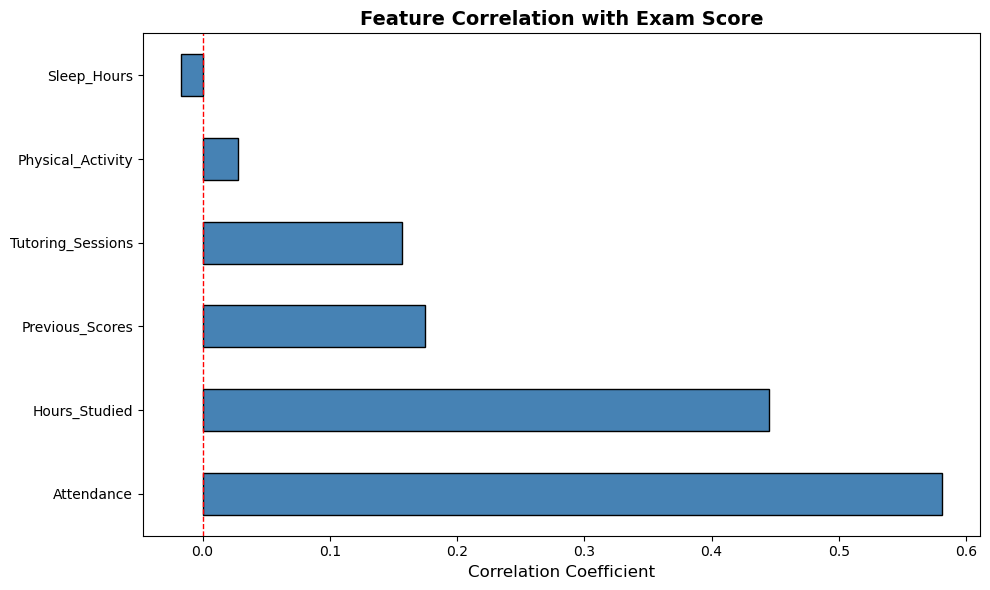

In [12]:
# Correlation matrix
corr_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Correlation with Exam Score
target_corr = df[numerical_cols].corrwith(df['Exam_Score']).sort_values(ascending=False)
print("\nCorrelation with Exam_Score:")
print(target_corr)

plt.figure(figsize=(10, 6))
target_corr.drop('Exam_Score').plot(kind='barh', color='steelblue', edgecolor='black')
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.title('Feature Correlation with Exam Score', fontsize=14, fontweight='bold')
plt.axvline(x=0, color='red', linestyle='--', linewidth=1)
plt.tight_layout()
plt.show()

### 9. Key Features vs Exam Scores

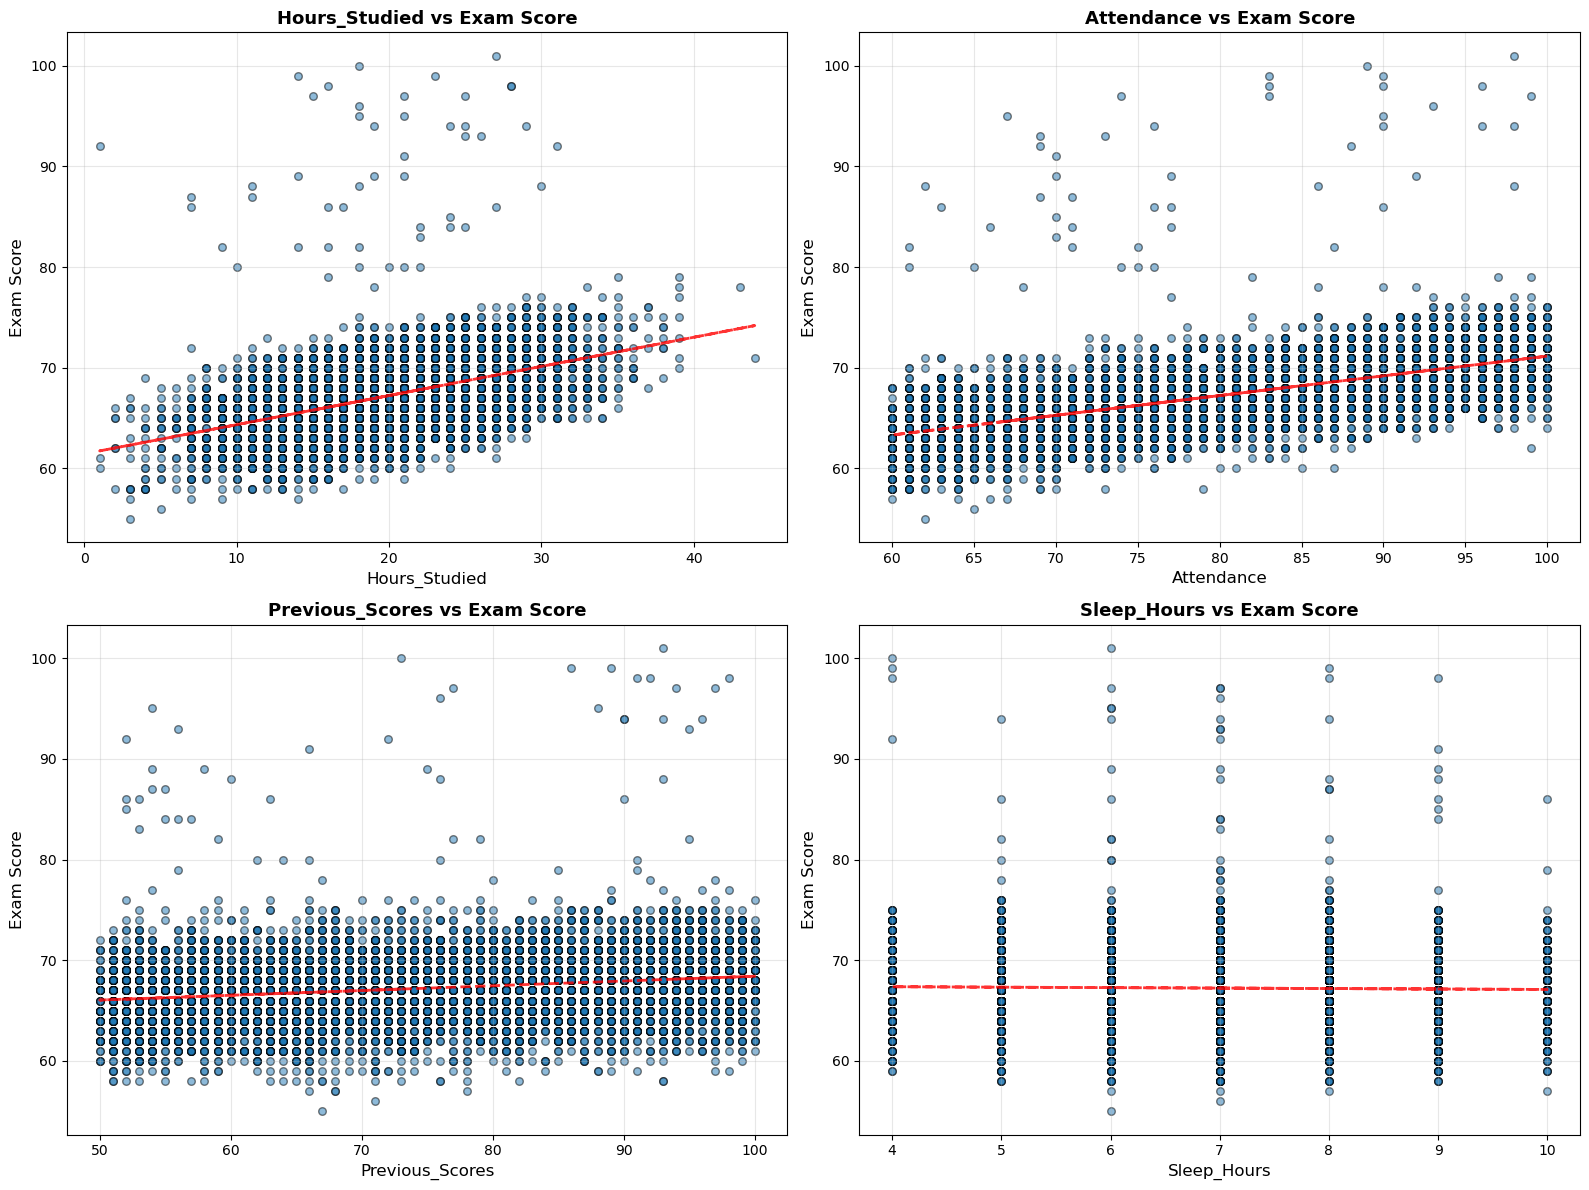

In [13]:
key_features = ['Hours_Studied', 'Attendance', 'Previous_Scores', 'Sleep_Hours']

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for idx, feature in enumerate(key_features):
    axes[idx].scatter(df[feature], df['Exam_Score'], alpha=0.5, edgecolor='black', s=30)
    axes[idx].set_xlabel(feature, fontsize=12)
    axes[idx].set_ylabel('Exam Score', fontsize=12)
    axes[idx].set_title(f'{feature} vs Exam Score', fontsize=13, fontweight='bold')
    
    # Add trend line
    z = np.polyfit(df[feature], df['Exam_Score'], 1)
    p = np.poly1d(z)
    axes[idx].plot(df[feature], p(df[feature]), "r--", linewidth=2, alpha=0.8)
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 10. Categorical Features vs Exam Scores

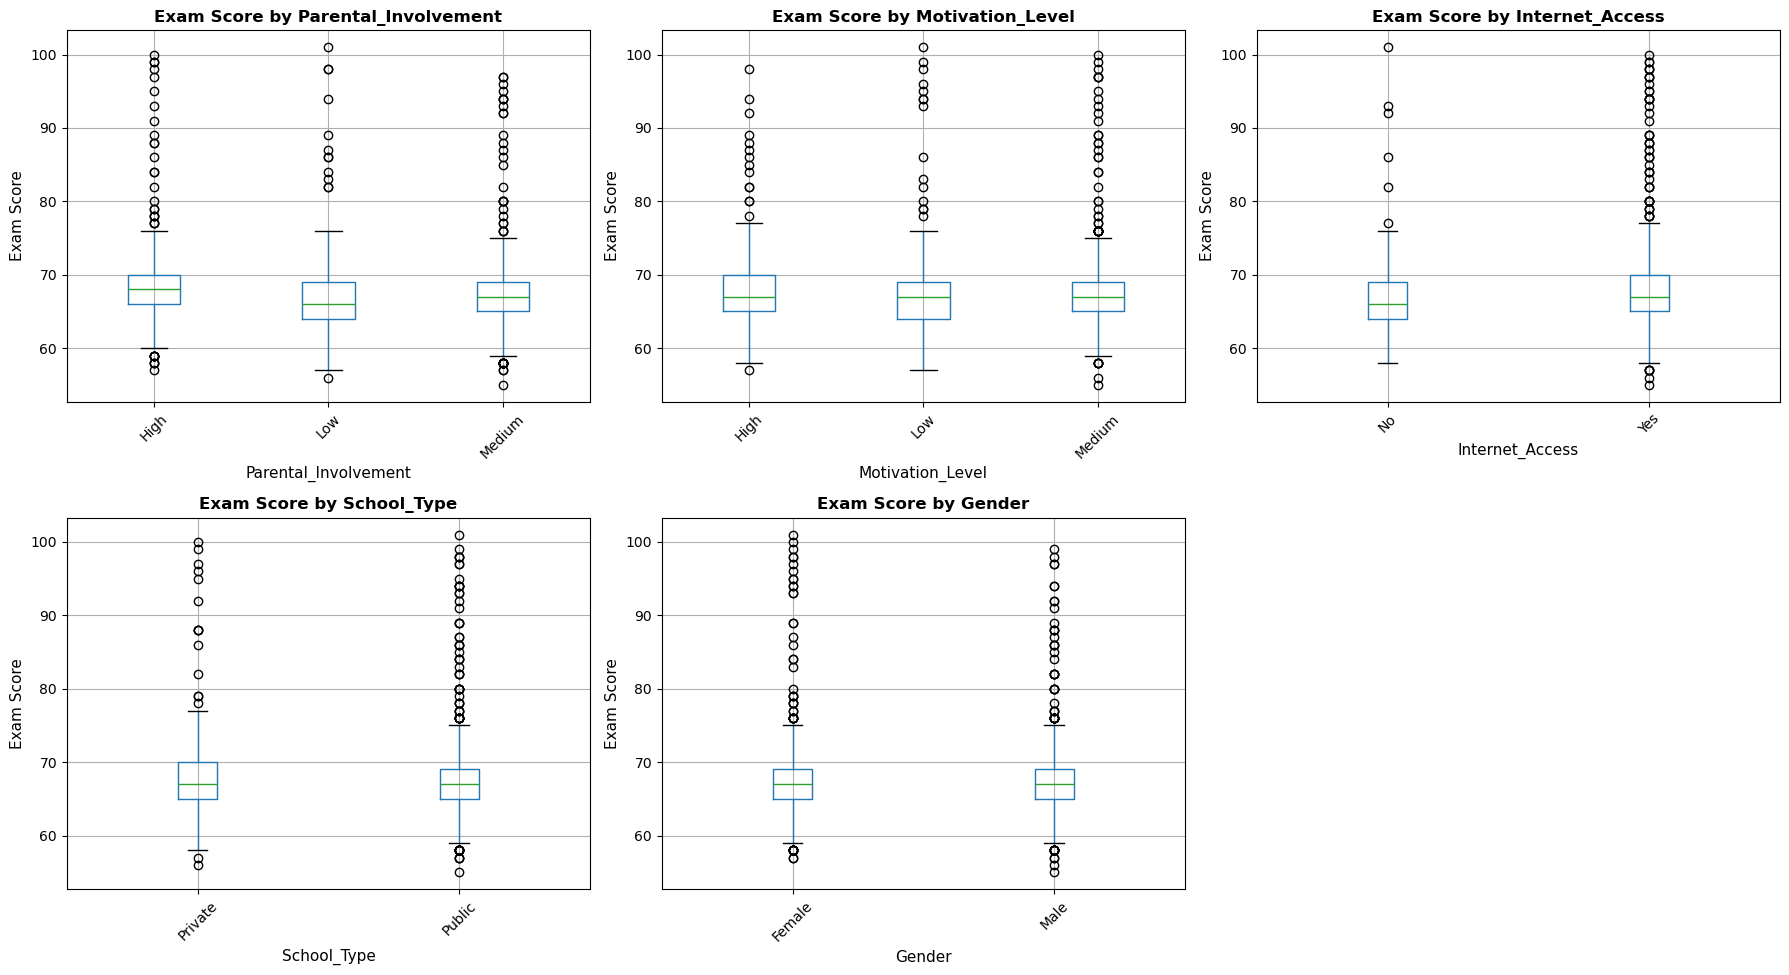

In [14]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for idx, col in enumerate(key_categoricals):
    df.boxplot(column='Exam_Score', by=col, ax=axes[idx])
    axes[idx].set_xlabel(col, fontsize=11)
    axes[idx].set_ylabel('Exam Score', fontsize=11)
    axes[idx].set_title(f'Exam Score by {col}', fontsize=12, fontweight='bold')
    plt.sca(axes[idx])
    plt.xticks(rotation=45)

axes[-1].axis('off')
plt.suptitle('')
plt.tight_layout()
plt.show()

### 11. Data Cleaning

In [15]:
df_clean = df.copy()
print(f"Original dataset shape: {df.shape}")

# Fill missing values
# For categorical: fill with mode
for col in ['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home']:
    if df_clean[col].isnull().sum() > 0:
        df_clean[col].fillna(df_clean[col].mode()[0], inplace=True)

print(f"\nMissing values after cleaning: {df_clean.isnull().sum().sum()}")
print(f"Dataset shape after cleaning: {df_clean.shape}")

# Display cleaned data
print("\nCleaned Dataset Info:")
df_clean.info()

Original dataset shape: (6607, 20)

Missing values after cleaning: 0
Dataset shape after cleaning: (6607, 20)

Cleaned Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality            

In [18]:
df_clean.to_csv(('data/processed/Cleaned_student_data.csv'), index=False)


### Key Insights

In [19]:
print(f"\n1. Dataset: 6607 students, 20 features")
print(f"\n2. Target Variable (Exam_Score):")
print(f"   - Range: {df['Exam_Score'].min()} to {df['Exam_Score'].max()}")
print(f"   - Mean: {df['Exam_Score'].mean():.2f}")
print(f"   - Std: {df['Exam_Score'].std():.2f}")
print(f"\n3. Top 3 Correlated Features with Exam Score:")
for i, (feature, corr) in enumerate(target_corr.drop('Exam_Score').head(3).items(), 1):
    print(f"   {i}. {feature}: {corr:.3f}")
print(f"\n4. Missing Values:")
print(f"   - Teacher_Quality: 78 (1.18%)")
print(f"   - Parental_Education_Level: 90 (1.36%)")
print(f"   - Distance_from_Home: 67 (1.01%)")
print(f"\n5. Data Quality: No duplicates found")
print("="*70)


1. Dataset: 6607 students, 20 features

2. Target Variable (Exam_Score):
   - Range: 55 to 101
   - Mean: 67.24
   - Std: 3.89

3. Top 3 Correlated Features with Exam Score:
   1. Attendance: 0.581
   2. Hours_Studied: 0.445
   3. Previous_Scores: 0.175

4. Missing Values:
   - Teacher_Quality: 78 (1.18%)
   - Parental_Education_Level: 90 (1.36%)
   - Distance_from_Home: 67 (1.01%)

5. Data Quality: No duplicates found
